In [155]:
import seaborn

In [96]:
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import os
import sys
from coco_eval.pycocotools.coco import COCO
from coco_eval.pycocoevalcap.eval import COCOEvalCap
import configuration
import argparse
import pandas as pd
import matplotlib.pyplot as plt

def get_score(ref_filename,gen_filename,data_config):
    ref_file = os.path.join(data_config["result_dir"],ref_filename)
    gen_file = os.path.join(data_config["result_dir"],gen_filename)

    if not os.path.isfile(ref_file):
        print("%s not found in %s\nExiting" %(ref_filename,data_config["result_dir"]))
        sys.exit()

    if not os.path.isfile(gen_file):
        print("%s not found in %s\nExiting" %(gen_filename,data_config["result_dir"]))
        sys.exit()

    # create coco object and cocoRes object
    coco = COCO(ref_file)
    cocoRes = coco.loadRes(gen_file)

    # create cocoEval object by taking coco and cocoRes
    cocoEval = COCOEvalCap(coco, cocoRes)

    # evaluate on a subset of images by setting
    # cocoEval.params['image_id'] = cocoRes.getImgIds()
    # please remove this line when evaluating the full validation set
    cocoEval.params['image_id'] = cocoRes.getImgIds()

    # evaluate results
    cocoEval.evaluate()
    return cocoEval

In [97]:
data_config = configuration.DataConfig().config
result_files = [i for i in os.listdir(data_config["result_dir"]) if "_generated.json" in i][:2]
models = [i[:-15] for i in result_files]
scores = []
for result in result_files:
    res = get_score("reference.json",result,data_config)
    scores.append(res.eval)

loading annotations into memory...
0:00:00.430141
creating index...
index created!
Loading and preparing results...     
DONE (t=0.01s)
creating index...
index created!
tokenization...
setting up scorers...
computing Bleu score...
{'reflen': 24577, 'guess': [24256, 21266, 18276, 15286], 'testlen': 24256, 'correct': [19014, 10246, 4848, 2015]}
ratio: 0.986939008016
Bleu_1: 0.774
Bleu_2: 0.606
Bleu_3: 0.458
Bleu_4: 0.335
computing METEOR score...
METEOR: 0.263
computing Rouge score...
ROUGE_L: 0.573
computing CIDEr score...
CIDEr: 0.394
loading annotations into memory...
0:00:00.409480
creating index...
index created!
Loading and preparing results...     
DONE (t=0.01s)
creating index...
index created!
tokenization...
setting up scorers...
computing Bleu score...
{'reflen': 24249, 'guess': [23863, 20873, 17883, 14893], 'testlen': 23863, 'correct': [18691, 10059, 4722, 1949]}
ratio: 0.984081817807
Bleu_1: 0.771
Bleu_2: 0.605
Bleu_3: 0.456
Bleu_4: 0.333
computing METEOR score...
METEOR: 0.

In [ ]:
table = {"model":[],"Bleu_1":[],"Bleu_2":[],"Bleu_3":[],"Bleu_4":[],"METEOR":[],"ROUGE_L":[],"CIDEr":[]}
table["model"] = models
table["Bleu_1"] = [i["Bleu_1"] for i in scores]
table["Bleu_2"] = [i["Bleu_2"] for i in scores]
table["Bleu_3"] = [i["Bleu_3"] for i in scores]
table["Bleu_4"] = [i["Bleu_4"] for i in scores]
table["METEOR"] = [i["METEOR"] for i in scores]
table["ROUGE_L"] = [i["ROUGE_L"] for i in scores]
table["CIDEr"] = [i["CIDEr"] for i in scores]
df = pd.DataFrame(table)

In [148]:
plt.figure(figsize=(2,1))

In [149]:
df.plot(x='model',marker='o',title="Captioning Scores")

In [150]:
plt.legend(loc='best')

In [151]:
import numpy as np

In [159]:
df

,Bleu_1,Bleu_2,Bleu_3,Bleu_4,CIDEr,METEOR,ROUGE_L,model
0,0.773583,0.606477,0.458340,0.334541,0.393545,0.263355,0.572815,model-9044
1,0.770695,0.604524,0.456208,0.332524,0.383300,0.261889,0.570237,model-10480


In [161]:
plt.yticks(np.arange(0.2, 1.0, 0.05))

([<matplotlib.axis.YTick at 0x7fe6579a4610>,
 <a list of 16 Text yticklabel objects>)

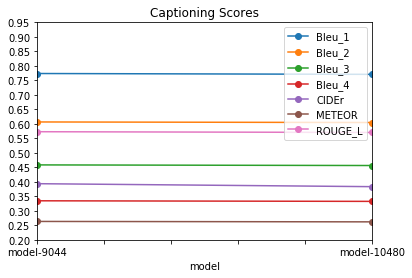

In [153]:
plt.show()

In [132]:
plt.savefig(os.path.join(data_config["result_dir"],"graph.png"))
plt.close()
with open(os.path.join(data_config["result_dir"],"result.csv"),"w") as fl:
    fl.write("%15s , %8s , %8s , %8s , %8s , %8s , %8s , %8s\n" 
            %("model","Bleu_1","Bleu_2","Bleu_3","Bleu_4","METEOR","ROUGE_L","CIDEr"))

    for model,data in zip(models,scores):
        fl.write("%15s , %8.3f , %8.3f , %8.3f , %8.3f , %8.3f , %8.3f , %8.3f\n"
                                                                %(model,data["Bleu_1"],
                                                                data["Bleu_2"],data["Bleu_3"],
                                                                data["Bleu_4"],data["METEOR"],
                                                                data["ROUGE_L"],data["CIDEr"]))